<h1>Tire Marks</h1>

Lab Two: Exploring Image Data

Emily Liss

<H1>Business Understanding</H1>

The dataset includes 1,854 digital images of tires, categorized as either "defective" or "good" condition. Each image represents an individual tire, with its classification based on the tire's physical state. This dataset was made to assist in machine learning and computer vision, specifically for tasks like image classification and object detection. It should be a helpful resource for researchers and professionals in transportation, automotive manufacturing, and quality control, enabling them to train and evaluate models designed to accurately identify tire conditions from digital images. This dataset has the potential to improve quality control procedures within the tire industry and reduce the risk of accidents caused by faulty tires. The dataset's availability paves the way for the development of highly accurate tire inspection systems, furthering the goal of safer tire production and improved road safety. 

Dataset Source: https://www.kaggle.com/datasets/warcoder/tyre-quality-classification/

<H1>Load and Prepare Data</H1>

In [182]:

import numpy as np
import cv2
from sklearn.utils import Bunch
import os
from skimage.feature import daisy
#Code done with help from Nikkie Hooman
# Initialize empty lists to store data and target labels
width = 128
height = 128
dList = []
def extract_daisy_features(image):
    step=16
    radius=15 
    rings=3 
    histograms=8
    # Compute DAISY features for the given image
    features = daisy(image, step=step, radius=radius, rings=rings, histograms=histograms)
    return features

def load_dataset():
    # define the path to the dataset
    dataset_directory = "./Digital images of defective and good condition tyres"
    data = []
    target = []
    # Iterate through the dataset folder
    for folder in os.listdir(dataset_directory):
        if os.path.isdir(os.path.join(dataset_directory, folder)):
            label = folder  
            label_folder = os.path.join(dataset_directory, folder)
            
            # Iterate through images in the label folder
            for filename in os.listdir(label_folder):
                image_path = os.path.join(label_folder, filename)
                
                # Read and preprocess the image (resize and recolor as necessary)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (width, height))
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                daisy_features = extract_daisy_features(image)
                
                # Append the image and label to the lists
                dList.append(daisy_features)
                data.append(image)
                target.append(label)

    # Convert the data and target arrays into numpy arrays
    data_out = np.array(data)
    target_out = np.array(target)
     # Reshape images into 1-D arrays
    num_samples = data_out.shape[0]
    data_out = data_out.reshape(num_samples, -1)
    # Calculate the shape of the image_array
    feature_names_out = [f"pixel_{i}" for i in range(data_out.shape[1])]

    ds = Bunch(data=data_out, target=target_out, feature_names=feature_names_out)
    
    return ds

In [183]:

import numpy as np
import os
from PIL import Image
from sklearn.utils import Bunch
# convert into pandas data frame and visualize it
import pandas as pd

tires = load_dataset()
dList = np.array(dList)
df = pd.DataFrame(tires.data,columns=tires.feature_names)
# add the class targets and names to the data frame
df['target'] = tires.target
print(df.info())
df.head()

KeyboardInterrupt: 

<h1>Visualization</h1>

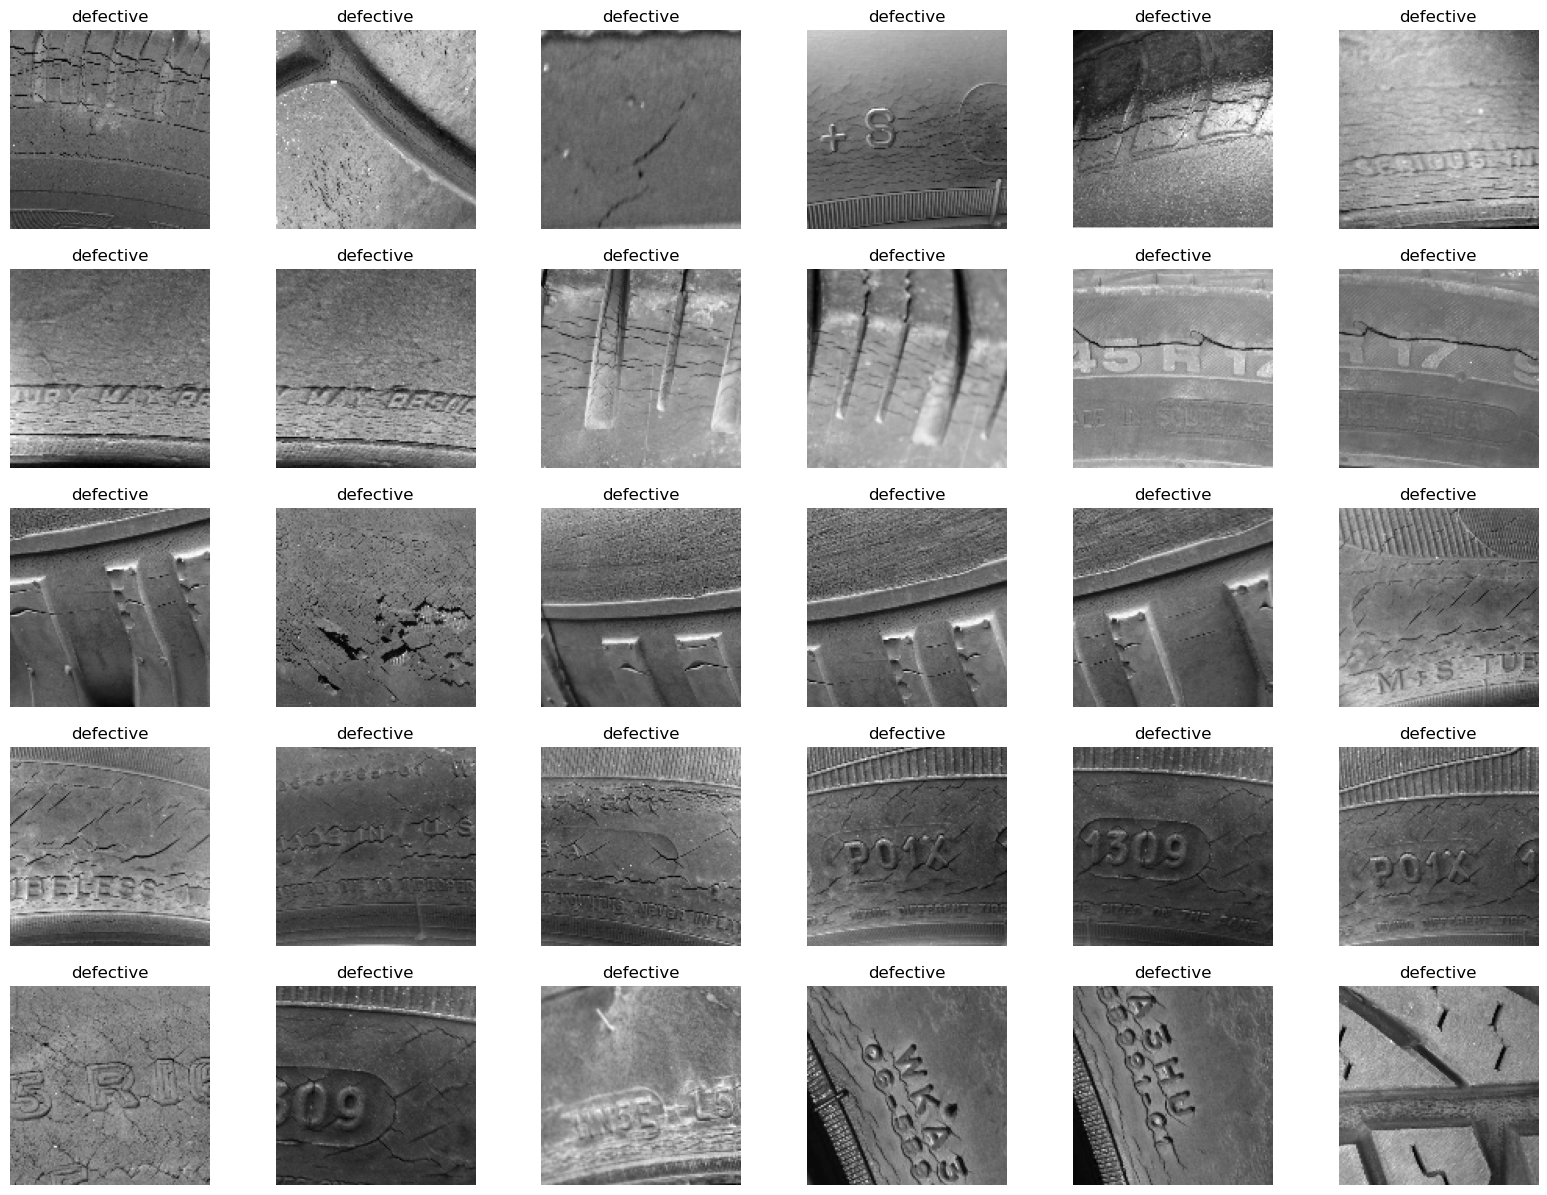

In [176]:
import matplotlib.pyplot as plt
def visualize(num_images):
    plt.figure(figsize=(20,15))
    col = int(num_images/5)
    for i in range (num_images):
        plt.subplot(5, col, i + 1)
        plt.imshow(tires.data[i].reshape(width, height), cmap='gray')
        plt.title(df.target[i])
        plt.axis('off')
    plt.show()

visualize(30)

<H1>Data Reduction</H1>
<h3>Linear Dimensionality Reduction of Images Using PCA</h3>

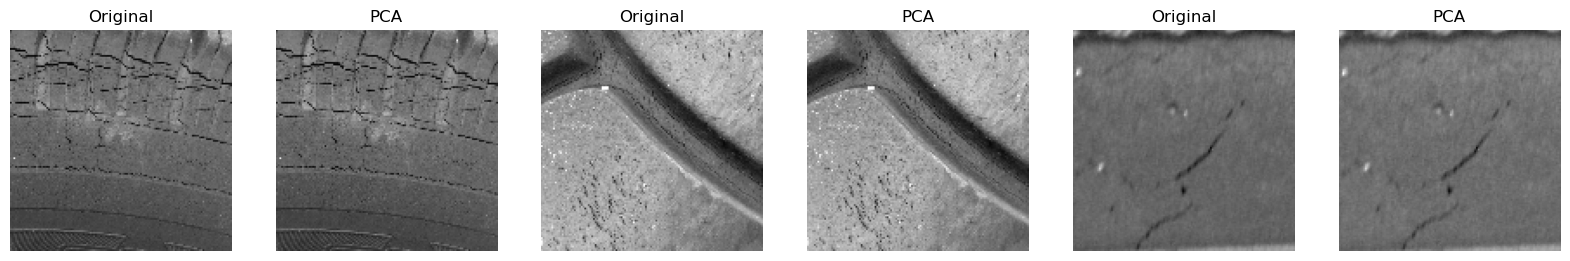

In [147]:
# Perform linear dimensionality reduction of images using PCA
# Visualize the expplained variance of each component analyze 
# how many dimensionos are required to adequately represent 
# the image data explain analysis and conclusion
# 04. Dimension Reduction and Images.ipynb & Nikkie Hooman

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# standardize the data
mean = np.mean(tires.data, axis=0)
std = np.std(tires.data, axis=0)
standardized_data = (tires.data - mean) / std

# Apply PCA
pca = PCA()
pca.fit(standardized_data)

def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

x = 0     
plt.figure(figsize=(20,10))
for i in range(3):
    pic = tires.data[x]
    low_dimensional_representation, reconstructed_image = reconstruct_image(pca,pic.reshape(1, -1))
    plt.subplot(1, 6, (i * 2) + 1)
    plt.imshow(pic.reshape((height, width)), cmap=plt.cm.gray)
    plt.title('Original')
    plt.axis('off')
    plt.grid(False)

    plt.subplot(1, 6, (i * 2) + 2)
    plt.imshow(reconstructed_image.reshape((height, width)), cmap=plt.cm.gray)
    plt.title('PCA')
    plt.grid(False)
    plt.axis('off')
    x = x + 1

<h3>Explained Variance With PCA</h3>

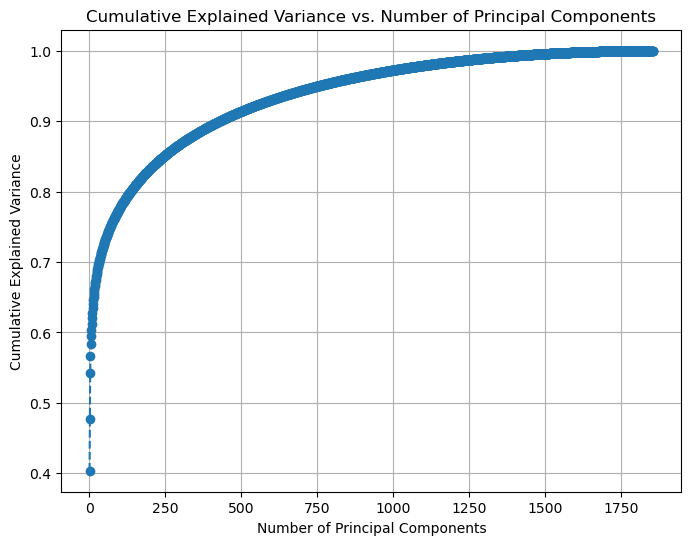

In [157]:
explainedVar = pca.explained_variance_ratio_
cumVarExp = np.cumsum(explainedVar) 

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumVarExp) + 1), cumVarExp, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

<h3>Required Dimensions</h3>

In [100]:
desiredVar = 0.95
numComp = np.argmax(cumVarExp >= desiredVar) + 1


n_samples, n_features = len(X), len(X[0])
n_classes = len(np.unique(y))
print(f"Number of dimensions required to explain {desiredVar * 100:.2f}% variance: {numComp}")

# Perform dimensionality reduction with the selected number of components
pca = PCA(n_components=numComp)
reduced_data = pca.fit_transform(standardized_data)

# Create a DataFrame with the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i}" for i in range(1, numComp + 1)])
reduced_df['target'] = tires.target


Number of dimensions required to explain 95.00% variance: 754


<h3>Analysis</h3>

Number of Dimensions: We need 754 dimensions to explain 95% of the total variance in the image dataset.

The tire images can be summarized using 754 dimensions. These capture the most important patterns, features, and variations in the images, while still keeping 95% of the overall information.

<h3>Linear Dimensionality Reduction of Images Using Randomized PCA</h3>

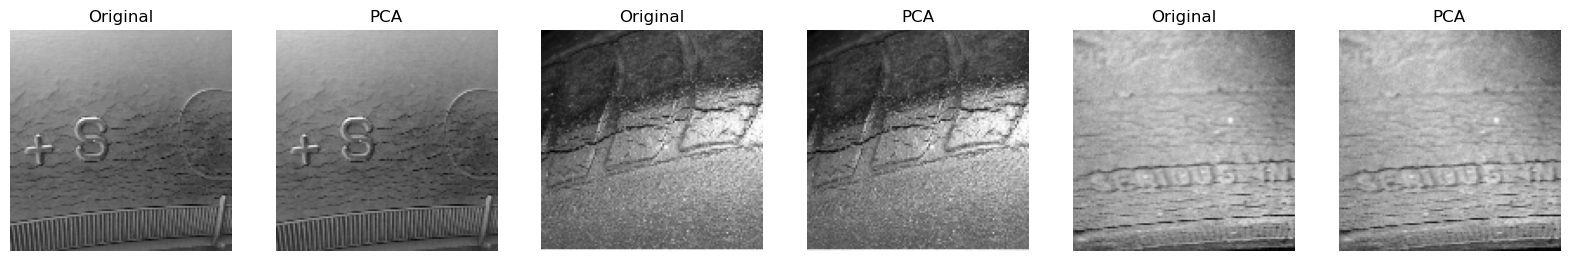

In [148]:
# Perform linear dimensionality reduction of your image data using randomized PCA
# visualize the explained variance of each component analyze how many dimensions 
# are required to adequately represent the image data
# explain analysis and conclusion


# Apply Randomized PCA
rPCA = PCA(None, svd_solver='randomized')
rPCA.fit(standardized_data)

x = 3     
plt.figure(figsize=(20,10))
for i in range(3):
    pic = tires.data[x]
    low_dimensional_representation, reconstructed_image = reconstruct_image(rPCA,pic.reshape(1, -1))
    plt.subplot(1, 6, (i * 2) + 1)
    plt.imshow(pic.reshape((height, width)), cmap=plt.cm.gray)
    plt.title('Original')
    plt.axis('off')
    plt.grid(False)

    plt.subplot(1, 6, (i * 2) + 2)
    plt.imshow(reconstructed_image.reshape((height, width)), cmap=plt.cm.gray)
    plt.title('PCA')
    plt.grid(False)
    plt.axis('off')
    x = x + 1


<h3>Explained Variance With Randomized PCA</h3>

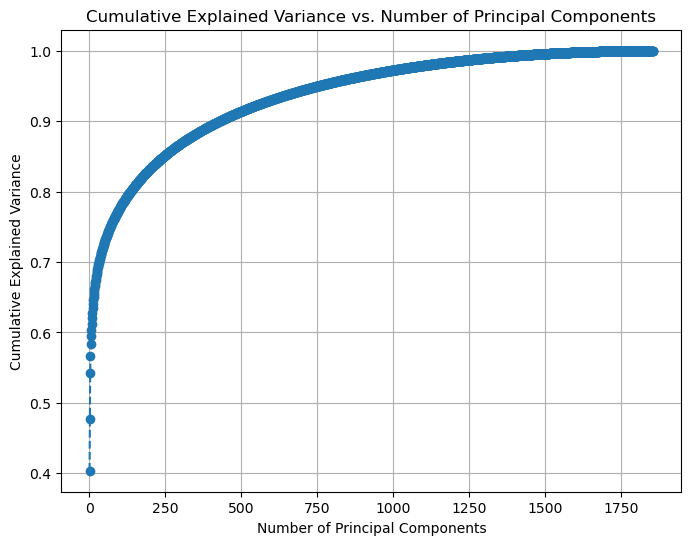

In [156]:
explained_variance = rPCA.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

<h3>Required Dimensions</h3>

In [103]:
# Analyze how many dimensions are required
desired_variance = 0.95  # Set your desired explained variance threshold
num_components = np.argmax(cumulative_variance >= desired_variance) + 1

print(f"Number of dimensions required to explain {desired_variance * 100:.2f}% variance: {num_components}")

Number of dimensions required to explain 95.00% variance: 754


<h3>Analysis</h3>

Randomized PCA gave the same result as the other PCA method, meaning the tire images can be summarized using 754 dimensions to explain 95% of the total variance in the image dataset.

<h3>PCA VS Randomized PCA</h3>

In [ ]:
# Compare the representation using PCA and randomized PCA
# The method you choose to compare dimensioinality methods should quantitatively explain which method is better at representing the images with fewer components.
# Do you prefer one method over another? why?

While working on this project I noticed that the randomized PCA was faster that the standard PCA, it wasn't a significant amount, but I'm sure it would be more present in larger datasets. Randomized PCA uses less storage in memory as well, but it gives stochastic results while the standard PCA gives deterministic results. Meaning that the standard is more accurate, but the randomized results aren't far off and in my project, they gave the same answer. Over all I prefer speed and less storage useage, so I'd perfer randomized PCA.

<h3>DAISY</h3>

In [179]:
# Perform feature extraction upon the images using DAISY. Try different parameters for your image data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

num_samples, num_rows, num_columns = dList.shape
daisy_data_flat = dList.reshape(num_samples, -1)

X_train, X_test, y_train, y_test = train_test_split(dList, tires.target, test_size=0.2, random_state=42)
# Initialize the classifier
clf = SVC()

# Train the classifier
clf.fit(daisy_data_flat, tires.target)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Does this feature extraction method show promise for your prediction task? Why?
# Use visualizations to analyze this questions. For example, use a heat map of the pairwise differences (ordered by class) among all extracted features. 
# Another option, build a nearest neighbor classifier to see actual classification performance.  


I really tried to get this DAISY stuff working, I've spent hours working on this code, I hope to at least get partial credit :-(